In [52]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data_address = "../hw1/LSDA_data/mnist/MNIST_data.npy"
data_label = "../hw1/LSDA_data/mnist/MNIST_labels.npy"
data = np.float64(np.load(data_address)/255)
label = np.float32(np.load(data_label))

split1 = int(0.8 * len(data))
split2 = int(0.9 * len(data))
train = data[:split1]
dev = data[split1:split2]
test = data[split2:]

train_label = label[:split1]
dev_label = label[split1:split2]
test_label = label[split2:]


def show_images(examples, nrows, ncols):
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(examples[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
    plt.show()

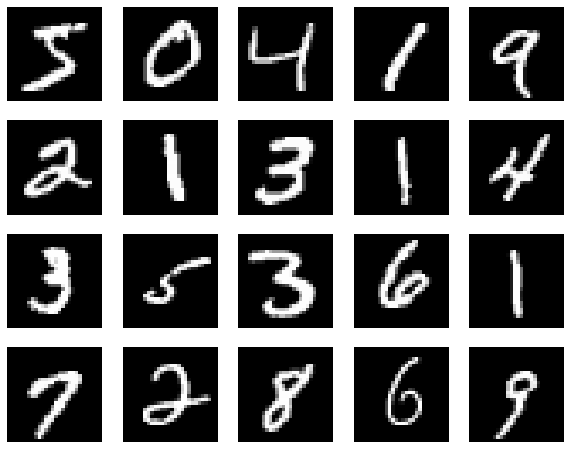

In [53]:
show_images(train, 4, 5 )

In [54]:
# perform PCA to extract principal components of the training data
# may not use PCA library

import sklearn
import scipy
from numpy import linalg as LA

# given a set of vectors of n dimension, compute the PCA of them.
# i.e., return the first top k eigenvectors of S

def PCA(X,k):
    # assume that the given vector are column vectors. If not, pass down column vectors 
    X_bar = np.mean(X, axis=0)
    X_tilde = X - X_bar
    S = np.cov(X_tilde.T)
    # compute the eigenvalues along with the eigenvectors
    # since S is symmetric we can use eigh instead of eig
    w,v = LA.eigh(S)
    # sort the pair of eigenvalues and eigenvectors
    # credti to https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt for sorting eigenvalues
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    return v[:,:k], w[:k]


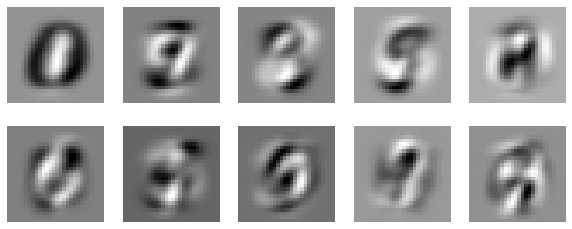

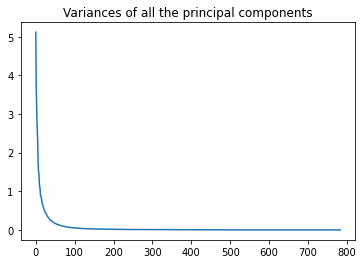

<Figure size 720x720 with 0 Axes>

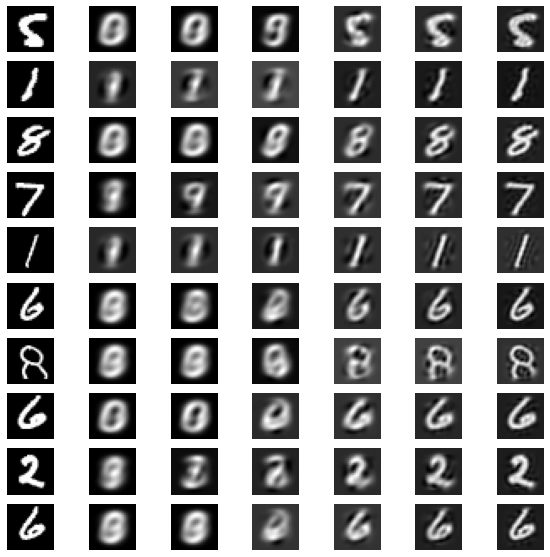

In [55]:
# display the top 10 principal components as images:

v,w = PCA(train, 10)
show_images(v.T, 2, 5)


V,W = PCA(train, 784)
plt.plot(W)
plt.title(label="Variances of all the principal components")
plt.show()
        


# revamp the code and test on the effects
# plot the variance, or the singular values. 
plt.figure(figsize=(10,10))
#1c dimension reduction
nrows = 10; ncols = 7
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(nrows, ncols, i * ncols + 1)
    plt.imshow(test[:10][i].reshape(28,28), cmap='gray')
    plt.axis('off')

dimensions = [1,2,5,25,50,100]
def dimensionality_reduction(data, dimensions, nrows, ncols):
    for i in range(len(dimensions)):
        eigenvectors, eigenvalues = PCA(train, dimensions[i])
        m = np.mean(train, axis=0)
        projection_mat = eigenvectors
        projected_data = (data - m) @ projection_mat @ projection_mat.T + m
        for j in range(10):
            plt.subplot(nrows, ncols, j*ncols + i + 2)
            plt.imshow(projected_data[j].reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

dimensionality_reduction(test[:10], dimensions, 10, 7)

The first column is the original text of the letters and the remaining 6 columns are the transformed letters with the first (1,2,5,25,50,100) eigenvectors. It is clear that as we include more eigenvectors, i.e., increase the Principal Components, we are getting mroe accurate representation of the images. The top Principal Component should be capturing the shape of the letter, i.e., whether the letter is linear or circular. But after the first principal component, I cannot really tell what the other first components are capturing.

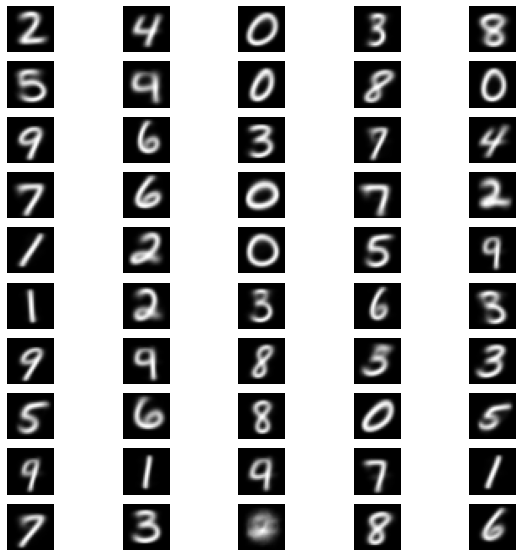

In [56]:
# 2 apply k means to the dataset, show the clusters centers of the data. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=50, init = 'random', max_iter=50)
kmeans.fit(train)
predict = kmeans.predict(train)

plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(10,5,i + 1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

In [57]:
# associate each cluster with the majority label


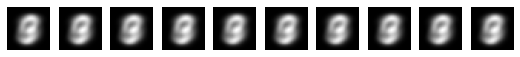

1-th iteration has loss -14421611.09


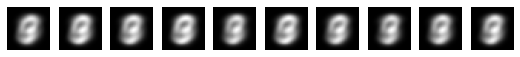

2-th iteration has loss -14230832.88


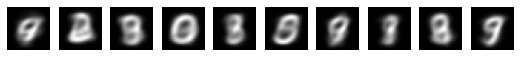

3-th iteration has loss -12679901.48


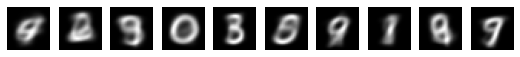

4-th iteration has loss -12127711.95


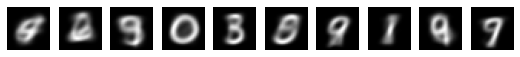

5-th iteration has loss -11957012.32


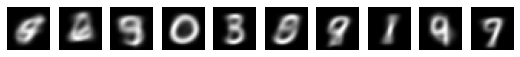

6-th iteration has loss -11862746.84


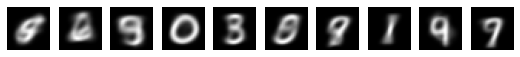

7-th iteration has loss -11807892.47


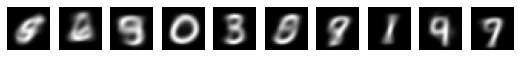

8-th iteration has loss -11772162.91


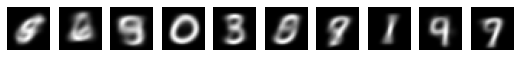

9-th iteration has loss -11742833.23


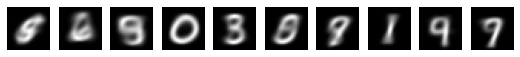

10-th iteration has loss -11723504.84


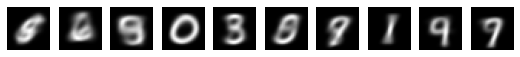

11-th iteration has loss -11715064.14


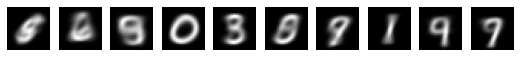

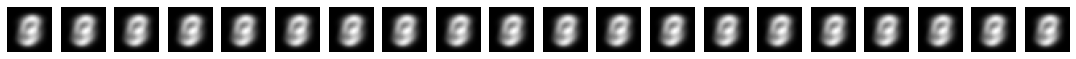

1-th iteration has loss -14423414.02


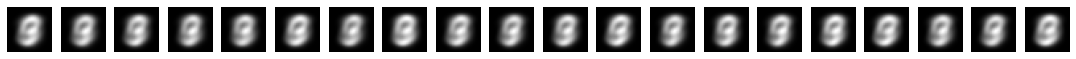

2-th iteration has loss -14185610.14


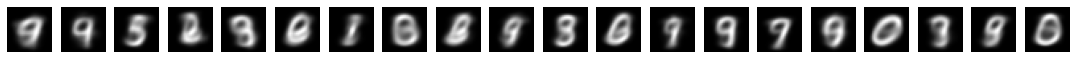

3-th iteration has loss -11969629.92


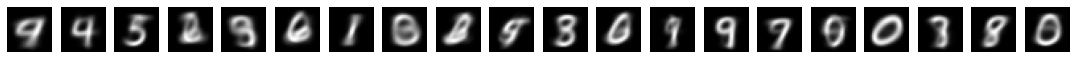

4-th iteration has loss -11315662.85


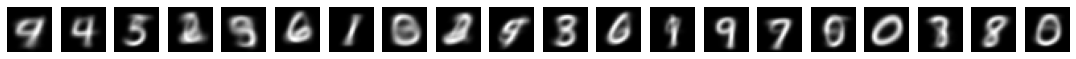

5-th iteration has loss -11155970.99


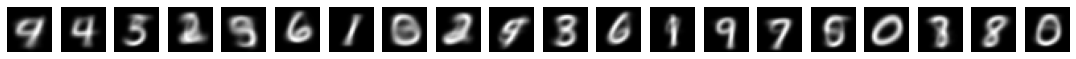

6-th iteration has loss -11045797.18


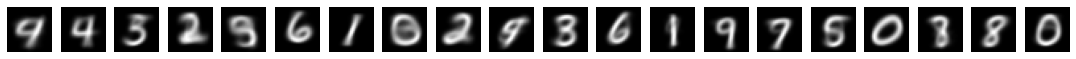

7-th iteration has loss -10964919.06


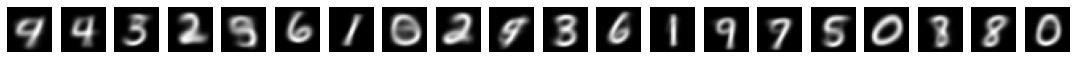

8-th iteration has loss -10907769.05


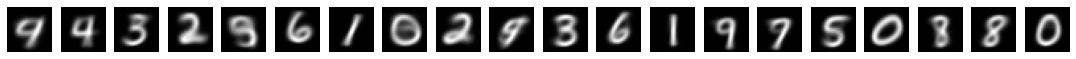

9-th iteration has loss -10866806.57


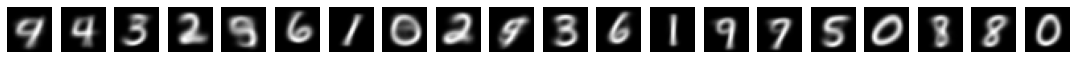

10-th iteration has loss -10835308.20


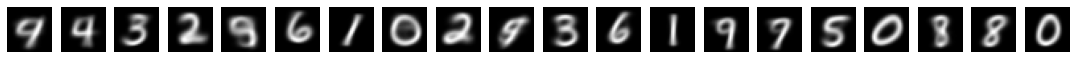

11-th iteration has loss -10809183.99


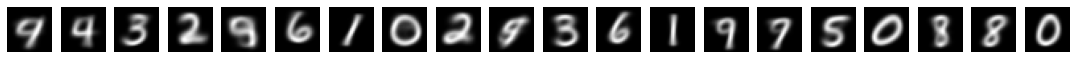

12-th iteration has loss -10787145.96


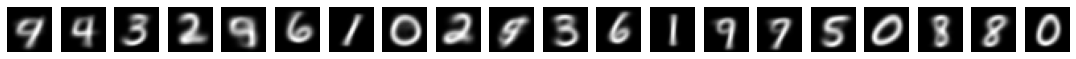

13-th iteration has loss -10769753.59


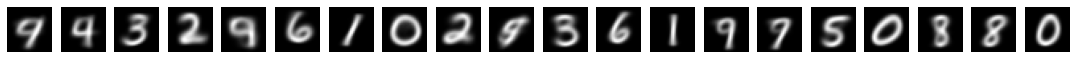

14-th iteration has loss -10755441.24


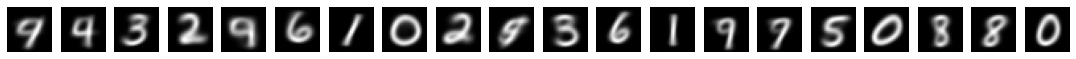

15-th iteration has loss -10743661.68


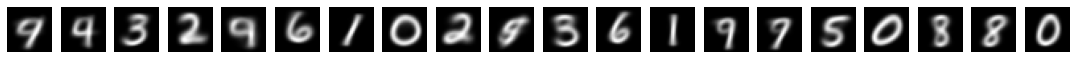

16-th iteration has loss -10735032.65


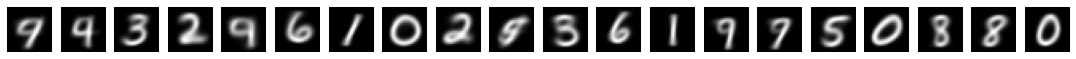

In [58]:
#3
#binarize the dataset with threshold pi = 0.5
# data_binarized = np.float64(np.load("../hw1/LSDA_data/mnist/MNIST_binarzied_data.npy")/255)
# label_binarized = np.float32(np.load("../hw1/LSDA_data/mnist/MNIST_binarzied_labels.npy"))

data_binarized = (data > 0.5).astype(int)
#implement EM algorithm with M = 10, 20
#with bayesian flavors

# pi is the 
def EMAlgo (data, M):
    pi = None
    p = None 
    loss = None
    prev = None
    # initialize a random NxM positive matrix W with rows that add up to 1
    N = len(data)
    W = np.random.rand(len(data), M)
    W = W/(np.sum(W,axis=1)[np.newaxis]).T
    threshold = 1e-3

    # implement the EM algorithm according to lecture week3 day1 slide 6
    for i in range(100):
        pi = 1/(N + 2) * (np.sum(W,axis=0)+1) #each iteration the EM algorithm updates pi_new

        p = (data.T @ W + 1) @ np.diag(1/(np.sum(W, axis=0)+2)) #result from Q2 quesiton(-1)
        # print("p is: ", p)
        plt.figure(figsize=(M,M))
        # print("original:")
        # for m in range(M):
        #     plt.subplot(1, M+1, m+1)
        #     plt.imshow(data[m].reshape(28,28), cmap ='gray')
        #     plt.axis('off')
        # plt.show()
        # print("EM:")


        # define loss function and compute the differences between successive iterations:

        if i > 0:
            prev = loss 
            g_p = np.sum(np.exp(g),axis=1)
            loss = np.sum(np.log(g_p))
            print('{0}-th iteration has loss {1:.2F}'.format(i,loss))
            if prev != None and np.abs(loss- prev) / np.abs(prev) < threshold: 
                for m in range(M):
                    plt.subplot(1, M+1, m+1)
                    plt.imshow(p[:,m].reshape(28,28), cmap='gray')
                    plt.axis('off')
                plt.show()
                break
        for m in range(M):
            plt.subplot(1, M+1, m+1)
            plt.imshow(p[:,m].reshape(28,28), cmap='gray')
            plt.axis('off')
        plt.show()


        # apply   results from question2 part b
        # g = np.sum(np.dot(data, np.log(p))) + np.sum(np.dot((1-data), np.log(1-p))) + np.log(pi)
        # a matrix of all possible g
        g = np.dot(data, np.log(p))
        g = g +  np.dot((1-data), np.log(1-p)) 
        log_pi = np.diag(np.log(pi))
        g = g +  np.ones((N,M)) @ log_pi
        g_max = np.max(g, axis=1)
        diff_num = np.exp(g-g_max[np.newaxis].T)
        W = diff_num / (np.sum(diff_num,axis=1))[np.newaxis].T


EMAlgo(data_binarized, 10)
EMAlgo(data_binarized, 20)

We can tell clearly that once the EM algorithm converges, we are getting smoother images than the original mixture that cannot be distinguished.

scaling the mean of matrix A by:  1
The 012 digits with Spectral Clustering, with scale =  1


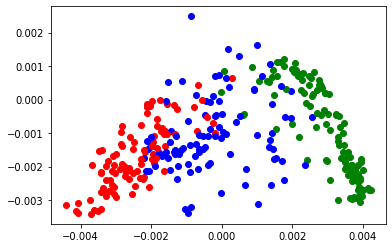

scaling the mean of matrix A by:  2
The 012 digits with Spectral Clustering, with scale =  2


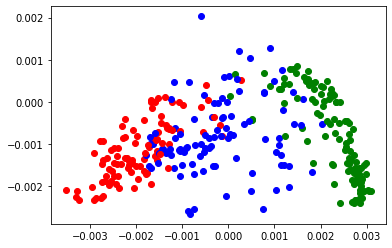

scaling the mean of matrix A by:  5
The 012 digits with Spectral Clustering, with scale =  5


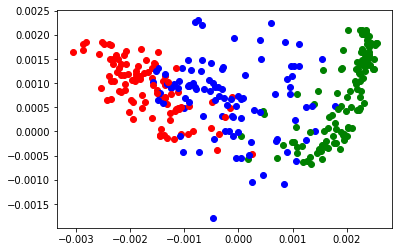

scaling the mean of matrix A by:  10
The 012 digits with Spectral Clustering, with scale =  10


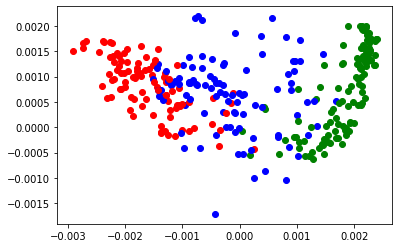

In [59]:
#part d spectral clustering
#from hw2:
#4d
import numba
from numba import jit
import pylab as py
sample_size = 1000
train = train[:sample_size]
train_labels = train_label[:sample_size]
dimension = len(train) 
# create a matrix for the distances between two speeches's tf_idf
    
A = np.zeros((dimension, dimension))
# @jit(nopython=True)
def computeA(A):
    for i in range(dimension):
        for j in range(i):
            v1 = np.array(train[i]).T
            v2 = np.array(train[j]).T
            A[i][j] = np.linalg.norm(v1 - v2)
    A = A + A.T 
    return A

A = computeA(A)

#4d
# scaling h by a constant C \in R

def generate (C, A, train, train_label):
    h = np.mean(A) * C
    W = np.exp(-A/h)
    D = np.diag(W.sum(axis=1))

    W_tilda = np.zeros((dimension, dimension))
    
    for i in range(dimension):
        for j in range(dimension):
            W_tilda[i][j] = W[i][j]/np.sqrt(D[i][i] * D[j][j])
    lamb, v =  np.linalg.eig(W_tilda)
    
    #4di
    # py.figure(figsize=(10,10))
    # py.plot(lamb[:30])
    # py.show()
    v = v.T
    for i in range(dimension):
        D[i][i] = D[i][i]**(-0.5)


    v0 = D.dot(v[0])
    v1 = D.dot(v[1])
    v2 = D.dot(v[2])
    return v1, v2, W, lamb
    #4dii
    # py.figure(figsize=(10,10))
    # py.plot(v0, c='red')
    # py.plot(v1, c='green')
    # py.plot(v2, c='blue')
    # py.show()

    # py.figure(figsize=(10,10))
    # for i in range(dimension):
    #     if int(speeches[i]['year']) < 1913:
    #         py.scatter(v1[i], v2[i], c='red')
    #         py.annotate(speeches[i]['year'], (v1[i], v2[i]), color='red')
    #     else:
    #         py.scatter(v1[i],v2[i], c='green')
    #         py.annotate(speeches[i]['year'], (v1[i], v2[i]), color='green')
    # py.show()
    # select images labeled 0,1,2

def plotscatter(v1, v2, train_label, C):
    img = []
    for i in range(dimension):
        if train_label[i] in [0,1,2]:
            img.append((i, train_label[i]))
    for idx, train_label in img:
        if train_label == 0:
            py.scatter(v1[idx], v2[idx], color='red')
        if train_label == 1:
            py.scatter(v1[idx], v2[idx], color='green')
        if train_label == 2:
            py.scatter(v1[idx], v2[idx], color='blue')
    print("The 012 digits with Spectral Clustering, with scale = ", C)
    
    return img
        

scales = [1,2,5,10] #experimenting with different constants
for scale in scales:
    print("scaling the mean of matrix A by: ", scale)
    v2, v3, W, lamb = generate(scale, A, train, train_labels)
    plotscatter(v2,v3, train_labels, scale)
    py.show()



With kmeans


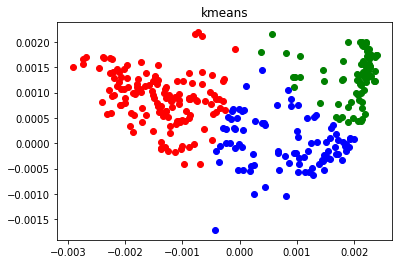

In [60]:
#run k-means on the top 2 eigenvectors/eigenvalues
train_digits = []
for i,label in img:
    train_digits.append((v2[i],v3[i]))

kmeans = KMeans(n_clusters=3, n_init=10, max_iter=50)
kmeans.fit(train_digits)
predicted = kmeans.predict(train_digits)
print("With kmeans")
for i in range(len(predicted)):
    if (predicted[i] == 0):
        py.scatter(train_digits[i][0], train_digits[i][1], color='red')
    elif (predicted[i] == 1):
        py.scatter(train_digits[i][0], train_digits[i][1], color='green')
    elif (predicted[i] == 2): 
        py.scatter(train_digits[i][0], train_digits[i][1], color='blue')
        py.title("kmeans")


In [61]:
#continuous embedding: 
def embedding (data, eigenvalues, C, D):
    K = []
    # scale by constant C,
    x1 = np.array(data).T
    for i in range(sample_size):
        x2 = np.array(train[i]).T
        diff = -np.linalg.norm(x2-x1) /C
        K.append(np.exp(diff))
    

    # for i in range(sample_size):
    e1 = sum([v2[i] * K[i]/(np.sqrt(sum(K) * D[i][i])) for i in range(sample_size)])/eigenvalues[1]
    e2 = sum([v3[i] * K[i]/(np.sqrt(sum(K) * D[i][i])) for i in range(sample_size)])/eigenvalues[2]

    return e1, e2


The 012 digits with Spectral Clustering, with scale =  10


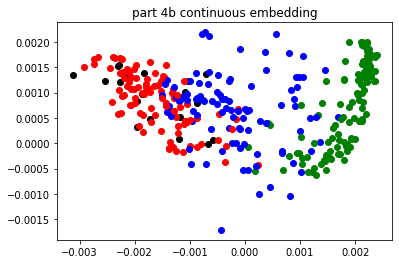

In [62]:


for i in range(1000,1200):
    if(train_label[i] == 0):
        e1, e2 = embedding(data[i], lamb, np.mean(A) * 10, np.diag(W.sum(axis=1)))
        py.scatter(e1,e2,color='black')   

plotscatter(v2,v3,train_labels,10)


py.title(label="part 4b continuous embedding")
py.show()